In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Import data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# class names represented as integers in labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Images' pre-processing

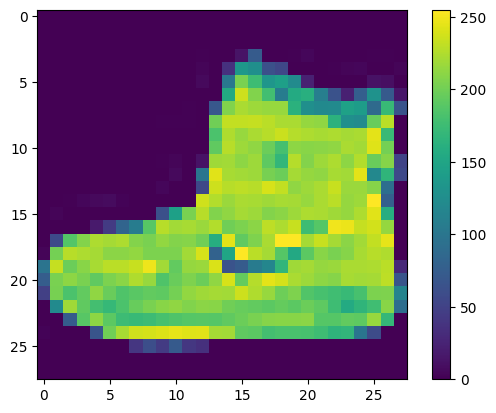

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

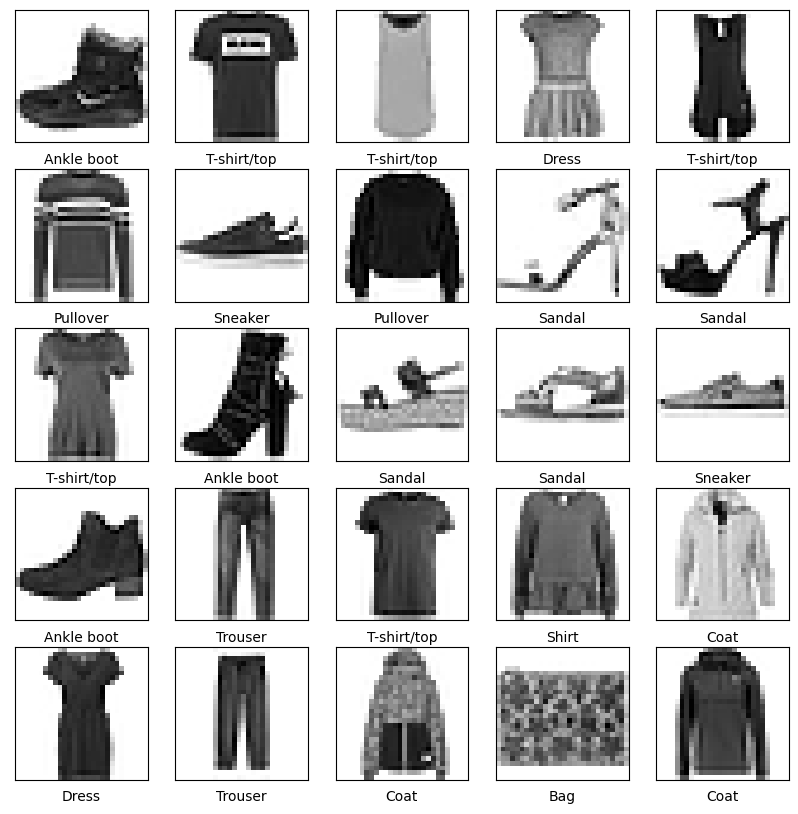

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Definition

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [10]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4926 - accuracy: 0.8254
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8633
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8781
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3090 - accuracy: 0.8878
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.8964
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9003
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9048
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.9071
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

## Evaluation

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3892 - accuracy: 0.8903 - 718ms/epoch - 2ms/step

Test accuracy: 0.8902999758720398


## Prediction

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [13]:
predictions[0]

array([1.3719052e-18, 1.3971861e-20, 2.7887777e-20, 1.3500182e-17,
       2.1505482e-21, 1.5283769e-06, 4.7264625e-18, 2.3457362e-05,
       7.2959657e-15, 9.9997497e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

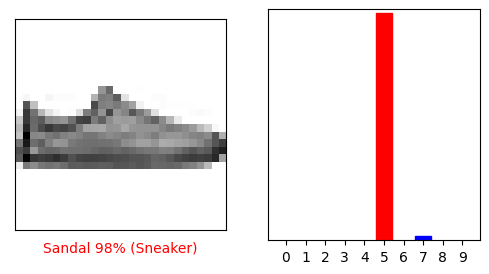

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

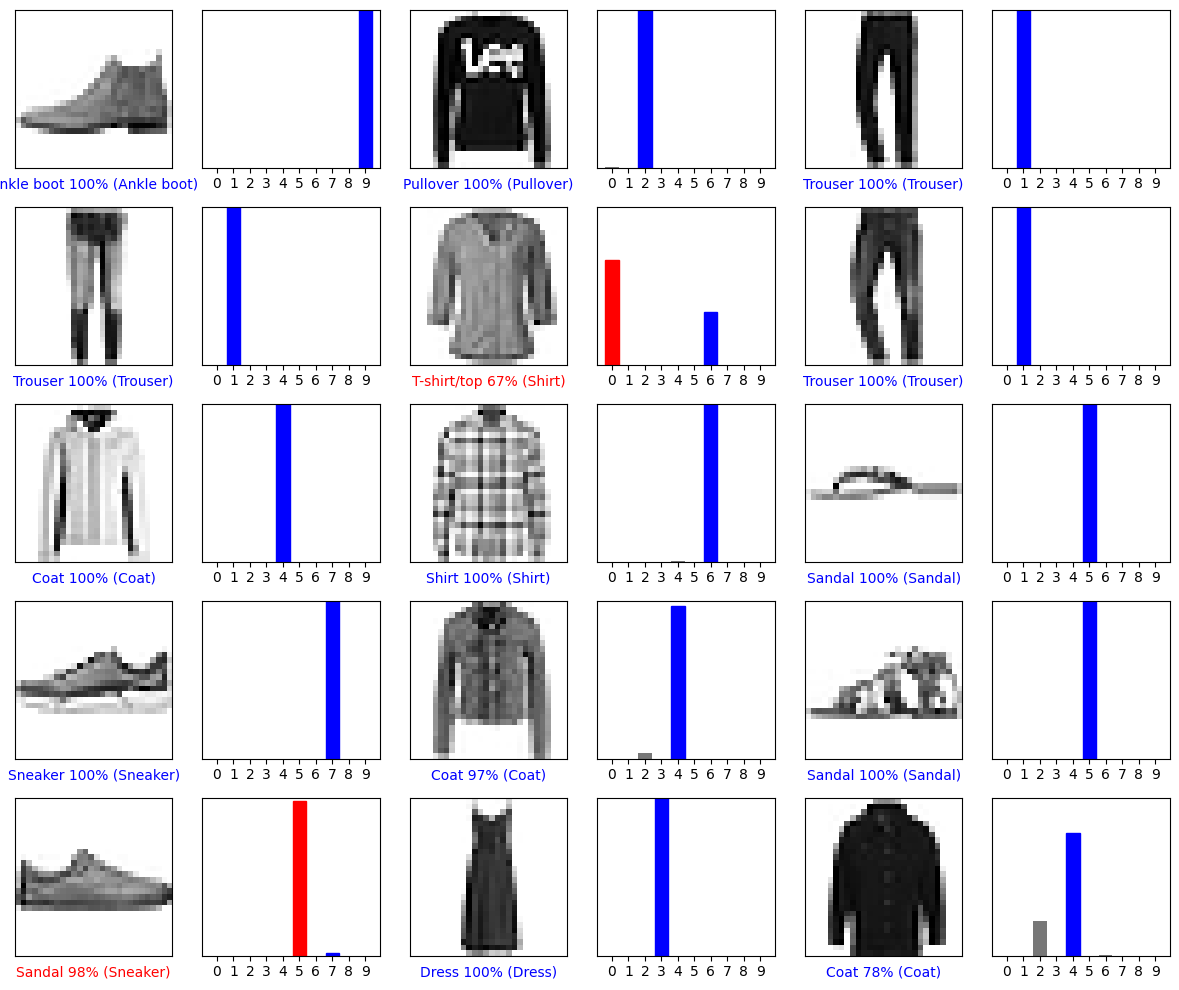

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()